In [1]:
#General imports.

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
def setint():
    mpld3.enable_notebook()
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10)
def noint():
    mpld3.disable_notebook()
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)


import ROOT as r
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import csv
import pandas

#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import numpy as np
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

plt.rcParams['figure.facecolor'] = 'white'

noint()

Welcome to JupyROOT 6.12/06


### lets start by getting the start and end times from the 9d dataset

In [2]:
import csv
import time
import calendar

startTimeVec = []
timeFormat = "%Y-%m-%d %H:%M:%S"

with open('query.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        try:
            startTimeVec.append((int(row[0]), 
                                 time.strptime(row[3], timeFormat), 
                                 time.strptime(row[5],timeFormat),
                                calendar.timegm(time.strptime(row[3], timeFormat)),
                                calendar.timegm(time.strptime(row[5], timeFormat))))
        except:
            print("ERROR: ", row)
        
        line_count += 1
            

ERROR:  ['16390', '2018-05-05 19:11:25.259076', 'manget off\\', ' internal trigger', '2018-05-05 19:11:03', '1.44655269480609e+15', '2018-05-05 17:10:07', '0.283298501796114', 'Jason and Pino', '/data1/gm2', '181187', '1000246936244', '1254949', 'N']
ERROR:  ['16391', '2018-05-05 21:12:52.163599', 'manget off\\', ' internal trigger', '2018-05-05 21:12:25', '1.44755293709596e+15', '2018-05-05 19:11:18', '0.223332989254604', 'Jason and Pino', '/data2/gm2', '181357', '1000242289869', '1255447', 'N']
ERROR:  ['16392', '2018-05-05 23:14:05.460477', 'manget off\\', ' internal trigger', '2018-05-05 23:13:43', '1.44855315645587e+15', '2018-05-05 21:12:44', '0.271374356209641', 'Jason and Pino', '/data1/gm2', '181205', '1000219359911', '1255945', 'N']
ERROR:  ['16393', '2018-05-06 01:15:05.306192', 'manget off\\', ' internal trigger', '2018-05-06 01:14:44', '1.44955338886287e+15', '2018-05-05 23:13:58', '0.195558058471213', 'Jason and Pino', '/data2/gm2', '180767', '1000232407000', '1256443', '

In [3]:
startTimeVec[1]

(16356,
 time.struct_time(tm_year=2018, tm_mon=5, tm_mday=4, tm_hour=10, tm_min=1, tm_sec=54, tm_wday=4, tm_yday=124, tm_isdst=-1),
 time.struct_time(tm_year=2018, tm_mon=5, tm_mday=4, tm_hour=8, tm_min=40, tm_sec=42, tm_wday=4, tm_yday=124, tm_isdst=-1),
 1525428114,
 1525423242)

In [4]:
ding = startTimeVec[1][2]

In [5]:
print(ding)

time.struct_time(tm_year=2018, tm_mon=5, tm_mday=4, tm_hour=8, tm_min=40, tm_sec=42, tm_wday=4, tm_yday=124, tm_isdst=-1)


In [6]:
calendar.timegm(ding)

1525423242

In [7]:
dfrun = pandas.DataFrame(startTimeVec, columns=['run','timeend_full','timestart_full','timeend','timestart'])

In [8]:
dfrun['deltat'] = dfrun['timeend'] - dfrun['timestart'] 

In [9]:
dfrun.head()

,run,timeend_full,timestart_full,timeend,timestart,deltat
0,16355,"(2018, 5, 4, 8, 39, 51, 4, 124, -1)","(2018, 5, 4, 8, 2, 31, 4, 124, -1)",1525423191,1525420951,2240
1,16356,"(2018, 5, 4, 10, 1, 54, 4, 124, -1)","(2018, 5, 4, 8, 40, 42, 4, 124, -1)",1525428114,1525423242,4872
2,16357,"(2018, 5, 4, 11, 15, 16, 4, 124, -1)","(2018, 5, 4, 10, 2, 11, 4, 124, -1)",1525432516,1525428131,4385
3,16358,"(2018, 5, 4, 12, 35, 37, 4, 124, -1)","(2018, 5, 4, 11, 15, 34, 4, 124, -1)",1525437337,1525432534,4803
4,16359,"(2018, 5, 4, 13, 3, 1, 4, 124, -1)","(2018, 5, 4, 12, 35, 57, 4, 124, -1)",1525438981,1525437357,1624


In [10]:
dfrun.describe()

,run,timeend,timestart,deltat
count,156.000000,1.560000e+02,1.560000e+02,156.000000
mean,16449.775641,1.525776e+09,1.525772e+09,3914.974359
std,53.305519,2.060844e+05,2.058430e+05,3445.638223
min,16355.000000,1.525423e+09,1.525421e+09,36.000000
25%,16409.750000,1.525610e+09,1.525608e+09,2496.250000
50%,16451.500000,1.525782e+09,1.525768e+09,4210.000000
75%,16492.250000,1.525951e+09,1.525949e+09,4602.000000
max,16539.000000,1.526118e+09,1.526118e+09,35050.000000


---

### and also getting the temperatures for that period of time along with their timestamps

In [11]:
filelist = ["./calo"+str(i)+"_9d_temps.csv" for i in range(1,25)]
print(filelist)

['./calo1_9d_temps.csv', './calo2_9d_temps.csv', './calo3_9d_temps.csv', './calo4_9d_temps.csv', './calo5_9d_temps.csv', './calo6_9d_temps.csv', './calo7_9d_temps.csv', './calo8_9d_temps.csv', './calo9_9d_temps.csv', './calo10_9d_temps.csv', './calo11_9d_temps.csv', './calo12_9d_temps.csv', './calo13_9d_temps.csv', './calo14_9d_temps.csv', './calo15_9d_temps.csv', './calo16_9d_temps.csv', './calo17_9d_temps.csv', './calo18_9d_temps.csv', './calo19_9d_temps.csv', './calo20_9d_temps.csv', './calo21_9d_temps.csv', './calo22_9d_temps.csv', './calo23_9d_temps.csv', './calo24_9d_temps.csv']


In [12]:
tempVec = []
timeFormatTemp = "%Y-%m-%d %H:%M:%S.%f" # 2018-05-12 09:51:38.169989 |

for file in filelist:
    #tempVeci = []

    with open(file) as csv_file:
        caloNum = int(((file.split('calo'))[1].split('_'))[0])
        csv_reader = csv.reader(csv_file, delimiter='|')
        line_count = 0
        for row in csv_reader:
            try:
                ding = []
                for x in row[2][1:-1].split(','):
                    if float(x) > 0 and float(x) < 100:
                        ding.append(float(x))
                    else:
                        ding.append(float('nan'))
                #print(ding)
                tempVec.append((caloNum, ding, np.nanmean(ding), 
                                time.strptime(row[3], timeFormatTemp), 
                                calendar.timegm(time.strptime(row[3], timeFormatTemp)) ))
            except:
                print("ERROR: ", row)

            line_count += 1
            #if(line_count > 10):
            #    break
            
    #tempVec.append(tempVeci)

#print(tempVec)

In [13]:
df = pandas.DataFrame(tempVec, columns=['calo','temps','avgtemp','timefull','time'])

In [14]:
df.head()

,calo,temps,avgtemp,timefull,time
0,1,"[nan, 36.0, 37.3125, 37.0, 38.0, 38.8125, 39.7...",39.356944,"(2018, 5, 12, 9, 59, 38, 5, 132, -1)",1526119178
1,1,"[nan, 36.0, 37.3125, 37.0, 38.0, 38.8125, 39.7...",39.362500,"(2018, 5, 12, 9, 59, 8, 5, 132, -1)",1526119148
2,1,"[nan, 36.0, 37.3125, 37.0, 38.0625, 38.8125, 3...",39.369444,"(2018, 5, 12, 9, 58, 38, 5, 132, -1)",1526119118
3,1,"[nan, 36.0625, 37.3125, 37.0625, 38.0, 38.8125...",39.377778,"(2018, 5, 12, 9, 58, 8, 5, 132, -1)",1526119088
4,1,"[nan, 36.0, 37.3125, 37.0, 38.0625, 38.8125, 3...",39.379167,"(2018, 5, 12, 9, 57, 38, 5, 132, -1)",1526119058


In [15]:
df.describe()

,calo,avgtemp,time
count,550769.000000,550769.000000,5.507690e+05
mean,12.483822,39.729843,1.525773e+09
std,6.917945,0.793873,2.012659e+05
min,1.000000,36.662760,1.525421e+09
25%,6.000000,39.349185,1.525600e+09
50%,12.000000,39.741477,1.525775e+09
75%,18.000000,40.168605,1.525947e+09
max,24.000000,42.623698,1.526119e+09


In [16]:
df1 = df.loc[ df['calo'] == 1 ]

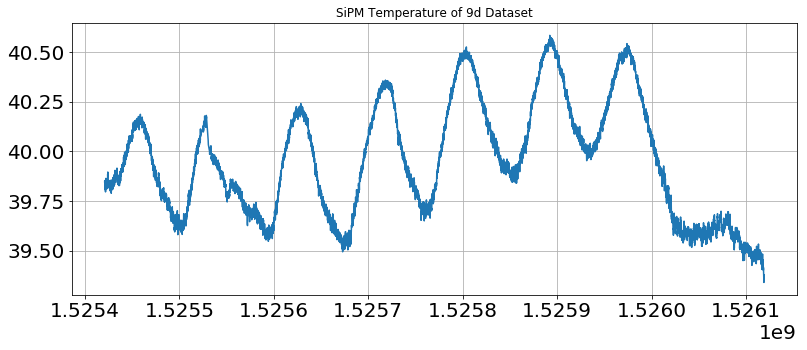

In [17]:
fig, ax = plt.subplots(figsize=(13,5))
plt.title("SiPM Temperature of 9d Dataset")
plt.plot(df1['time'], df1["avgtemp"])
runRecs = []
for i, row in dfrun.iterrows():
    ding = matplotlib.patches.Rectangle([row['timestart'], 42], row['timeend'] - row['timestart'], 2, color='red', alpha=0.5)
    runRecs.append(ding)
for rec in runRecs:
    ax.add_patch(rec)
    
plt.grid()

plt.show()

In [18]:
meanTemps = []
for i, row in dfrun.iterrows():
    dfi = (df.loc[df['time'] > row['timestart']]).loc[df['time'] < row['timeend']]
    
    meani = dfi['avgtemp'].mean()
    meanTemps.append((row['run'], meani ))


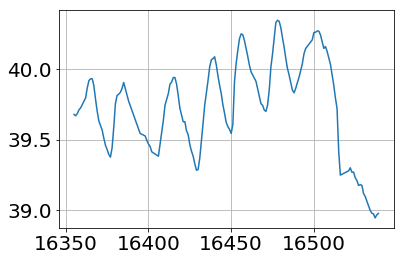

In [19]:
runs, temps = zip(*meanTemps)
plt.plot(runs,temps)
plt.grid()
plt.show()

good calos:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24]


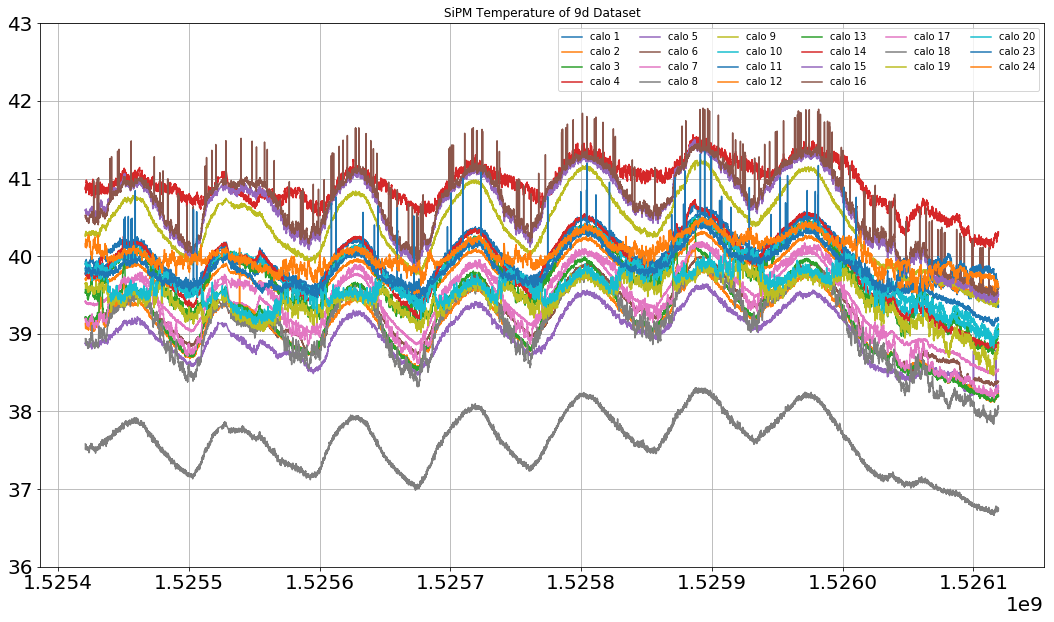

In [20]:
noint()
fig, ax = plt.subplots(figsize=(18,10))

#goodcalos = [i for i in range(1,16)]+[i for i in range(17,21)]+[i for i in range(23,24)]
goodcalos = [i for i in range(1,21)]+[i for i in range(23,25)]
print("good calos: ", goodcalos)

for calo in goodcalos:
    df1 = df.loc[ df['calo'] == calo ]
    plt.title("SiPM Temperature of 9d Dataset")
    plt.plot(df1['time'], df1["avgtemp"], label='calo '+str(calo))
runRecs = []
for i, row in dfrun.iterrows():
    ding = matplotlib.patches.Rectangle([row['timestart'], 42], row['timeend'] - row['timestart'], 2, color='red', alpha=0.5)
    runRecs.append(ding)
#for rec in runRecs:
#    ax.add_patch(rec)
    
plt.grid()
plt.ylim(36,43)

plt.legend(ncol=6)
plt.show()

In [21]:
avgtempvec = []
for calo in goodcalos:
    df1 = df.loc[ df['calo'] == calo ]
    ding = df1['avgtemp'].mean()
    avgtempvec.append(ding)

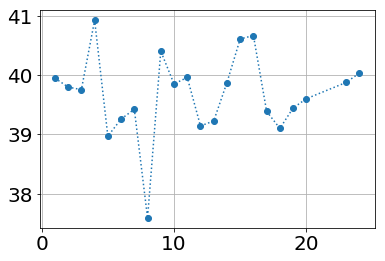

In [22]:
plt.plot(goodcalos,avgtempvec,":o")
plt.grid()
plt.show()

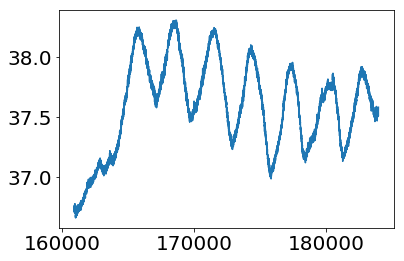

In [23]:
df1 = df.loc[ df['calo'] == 8 ]
plt.plot(df1['avgtemp'])

In [30]:
meanTemps = []
for calo in goodcalos:
    for i, row in dfrun.iterrows():
        dfi = (df.loc[df['time'] > row['timestart']]).loc[df['time'] < row['timeend']].loc[df['calo'] == calo]

        meani = dfi['avgtemp'].mean()
        meanTemps.append((calo, row['run'], meani ))

In [31]:
meanTemps[:10]

[(1, 16355, 39.83155555555554),
 (1, 16356, 39.83482447171097),
 (1, 16357, 39.847382842025695),
 (1, 16358, 39.86856770833331),
 (1, 16359, 39.89209595959597),
 (1, 16362, 39.96930632289752),
 (1, 16363, 40.0550783912747),
 (1, 16364, 40.12410774410778),
 (1, 16365, 40.14754016064249),
 (1, 16366, 40.147395833333334)]

In [32]:
dfavg = pandas.DataFrame(meanTemps, columns=['calo','run','avgtemp'])

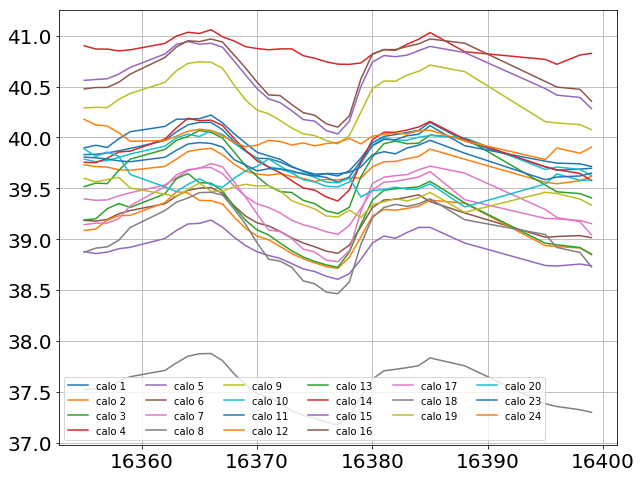

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
swingvec = []
for calo in goodcalos:
    dfi = dfavg.loc[dfavg['calo'] == calo].loc[dfavg['run'] < 16400]
    plt.plot(dfi['run'], dfi['avgtemp'], label='calo '+str(calo))
    swingvec.append( dfi['avgtemp'].max() - dfi['avgtemp'].min() )
plt.legend(ncol=6)
plt.grid()
plt.show()

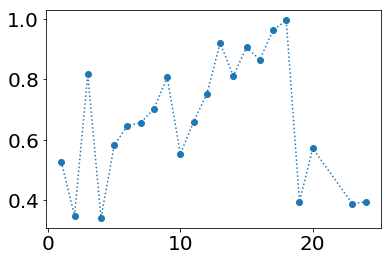

In [34]:
plt.plot(goodcalos,swingvec,'o:')
plt.show()

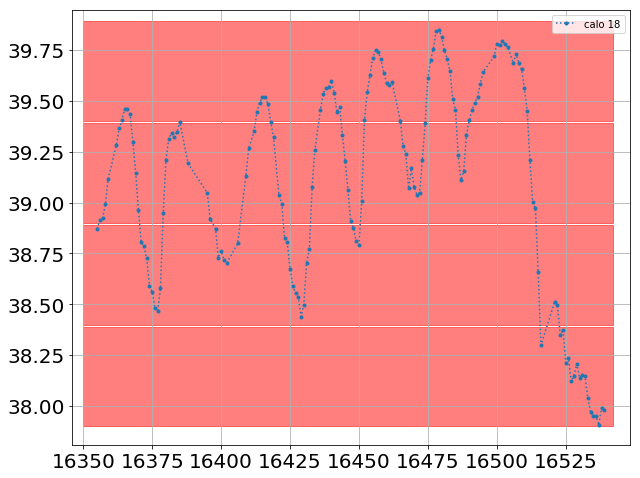

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
for calo in range(18,19):
    dfi = dfavg.loc[dfavg['calo'] == calo]
    plt.plot(dfi['run'], dfi['avgtemp'], ':.', label='calo '+str(calo))
    
runRecs = []
tempwidth = 5
for i in range(379,395,tempwidth):
    edge = i/10.
    ding = matplotlib.patches.Rectangle([16350, edge], 16542-16350 , tempwidth/10. - 0.01, 
                                        color='red', alpha=0.5)
    runRecs.append(ding)
for rec in runRecs:
    ax.add_patch(rec)
    
plt.legend(ncol=6)
plt.grid()
plt.show()

---

### And now lets actually take a look at this data

In [ ]:
f = r.TFile("./results_wiggleByRun_60h_Feb7.root")
f.cd("farline/calo13")
f.ls()

In [ ]:
wiggleHist = f.Get("farline").Get("calo13").Get("wiggleByRun").Clone()

In [ ]:
c = r.TCanvas()
wiggleHist.Draw("COLZ")
c.SetLogz()
c.Draw()

In [ ]:
#wiggleHist.GetYaxis().SetRangeUser(15920,15930)
wiggleHist.ProjectionY().Draw()

c.SetLogy()
c.Draw()

In [ ]:
# create a map of bin number to run number
print(wiggleHist.GetNbinsY())
runsInWiggle = []
for i in range(1,wiggleHist.GetNbinsY()+1):
    x =  wiggleHist.GetYaxis().GetBinCenter(i) - wiggleHist.GetYaxis().GetBinWidth(i)/2.
    runsInWiggle.append(int(x))
    #print(i, x , x-i )
    
def tobin(run):
    return int(run - (wiggleHist.GetYaxis().GetBinCenter(1) - wiggleHist.GetYaxis().GetBinWidth(1)/2.- 1) )

In [ ]:
tobin(15951)

In [ ]:
print(runsInWiggle)

In [ ]:
wiggleHist = f.Get("farline").Get("calo13").Get("wiggleByRun").Clone()
tempHists = []

for i, group in enumerate(runsByTemp):
    if(len(group)<1):
        continue
    h = wiggleHist.ProjectionX().Clone("htemp_"+str(i))
    h.Reset()
    h.SetTitle("Wiggle for Group "+str(i))
    for run in group:
        #print(run, tobin(run),tobin(run+1))
        h2 = wiggleHist.Clone()
        h2.GetYaxis().SetRangeUser(run, run+0.5)
        h3 = h2.ProjectionX("_px",tobin(run),tobin(run+1),"")
        h.Add(h3,1)
    tempHists.append(h.Clone("htemp_"+str(i)))

In [ ]:
print(tempHists)

In [ ]:
c = r.TCanvas("c","c",1800,600)
c.Divide(len(tempHists),1)
for i, h in enumerate(tempHists):
    c.cd(i+1)
    h.Draw()
    r.gPad.SetLogy()
c.Draw()

In [ ]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

In [ ]:
func = r.TF1("func", blinded_wiggle, 30,600,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(700000,64.4,0.4,0,0)
func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(2000)

In [ ]:
fivePars = []

for h in tempHists:
    c2 = r.TCanvas("c2","c2",1200,800)
    c2.Divide(2,1)
    c2.cd(1)
    r.gPad.SetLogy()

    r.gStyle.SetOptFit(111)
    allCaloWiggle = h.Clone()

    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

    residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

    for fit in range(2):
        print("Sarting fit:", fit+1)
        allCaloWiggle.Fit("func","REM")


    fivePars.append([func.GetParameter(i) for i in range(5)]+[func.GetNDF(),
                  func.GetChisquare(),
                  func.GetProb()])
    #chiSqAll = ( ( func.GetNDF(),
    #              func.GetChisquare(),
    #              func.GetProb() ) )

    allCaloWiggle.Draw()

    c2.cd(2)
    ding =  allCaloWiggle.Clone()
    ding.GetXaxis().SetRangeUser(100,125)
    ding.Draw()

    r.gPad.SetLogy()
    c2.Draw()

In [ ]:
print(fivePars)

In [ ]:
c = r.TCanvas("c","c",1800,600)
c.Divide(len(tempHists),1)
for i, h in enumerate(tempHists):
    c.cd(i+1)
    h.Draw()
    r.gPad.SetLogy()
c.Draw()

In [ ]:
dfFivePars = pandas.DataFrame(fivePars, columns=['N','tau','A','R','phi','ndf','chisq','prob'])

In [ ]:
dfFivePars.head()

In [ ]:
fig,ax = plt.subplots(2,4, figsize=(13,8))
for i, column in enumerate(dfFivePars):
    ax[int(np.floor(i/4))][i%4].plot(meanTemps, dfFivePars[column],':o')
    ax[int(np.floor(i/4))][i%4].set_title(column)
plt.show()

---

### now lets bring in a 13 parameter fit function

In [ ]:
def blinded_wiggle_cbo(x, p):
    norm     = p[0]
    life     = p[1]
    asym     = p[2]
    R        = p[3]
    phi      = p[4]
    A1       = p[5]
    A2       = p[6]
    A3       = p[7]
    lifeCBO  = p[8]
    omegaCBO = p[9]
    phiCBO1  = p[10]
    phiCBO2  = p[11]
    phiCBO3  = p[12]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
    
    cCBO = 1-math.exp(-time/lifeCBO)*A1*math.cos(omegaCBO*time + phiCBO1)
    ACBO = asym * (1 - math.exp(-time/lifeCBO) * A2 * math.cos(omegaCBO*time + phiCBO2))
    phiCBO = phi + math.exp(-time/lifeCBO)*A3*math.cos(omegaCBO*time + phiCBO3)
    
    return norm * math.exp(-time/life) * cCBO * (1 - ACBO*math.cos(omega*time + phiCBO))

In [ ]:
func13 = r.TF1("func13", blinded_wiggle_cbo, 30,500,13)
func13.SetParNames('N','#tau','A',
                   'R','#phi','A_{1}',
                   'A_{2}','A_{3}','#tau_{CBO}',
                   '#omega_{CBO}','#phi_{CBO - 1}')
func13.SetParName(11,'#phi_{CBO - 2}')
func13.SetParName(12,'#phi_{CBO - 3}')
func13.SetParLimits(4,-6.3,6.3) #Phases should be restricted to +/- 2Pi
#func13.SetParLimits(8,100,500) #Avoid divide by 0 error
func13.SetParLimits(8,0.0000001,100000000) #Avoid divide by 0 error
func13.SetParLimits(10,-6.3,6.3) 
func13.SetParLimits(11,-6.3,6.3)
func13.SetParLimits(12,-6.3,6.3)

#initial guesses, then updated with the first round of fit results
#func13.SetParameters(1500,64.4,0.4,0,0,1,1,1,.01,.01,0)
#func13.SetParameter(11,0)
#func13.SetParameter(12,0)
func13.SetParameters(100000, 64.32689658986958, -0.41149191856871803, 
                     -11.31981267111425, -4.201648334505292, -0.666502391530784, 
                     0.6927259503578, -0.38908021438317, 220, 
                     4.1, 0.4745581246420292)
func13.SetParameter(11, 6.299934663288357)
func13.SetParameter(12, 0.28579778778899545)
#func13.FixParameter(12,0) #currently this parameter is fixed, as it doesn't behave well if left to wander on its own


func13.SetLineColor(2)
func13.SetNpx(2000)

In [ ]:
thirteenPars = []
tempHistsFit13 = []

for j, h in enumerate(tempHists):
    
    if(j>0):
        break
    
    c2 = r.TCanvas("c2","c2",1200,800)
    c2.Divide(2,1)
    c2.cd(1)
    r.gPad.SetLogy()

    r.gStyle.SetOptFit(111)
    allCaloWiggle = h.Clone()

    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

    residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

    for fit in range(2):
        print("Sarting fit:", fit+1)
        allCaloWiggle.Fit("func13","REM")


    thirteenPars.append([func13.GetParameter(i) for i in range(13)]+[func13.GetNDF(),
                  func13.GetChisquare(),
                  func13.GetProb()])

    allCaloWiggle.Draw()

    c2.cd(2)
    ding =  allCaloWiggle.Clone()
    ding.GetXaxis().SetRangeUser(100,125)
    ding.Draw()

    r.gPad.SetLogy()
    c2.Draw()
    
    tempHistsFit13.append(allCaloWiggle.Clone())